In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species'] = df_iris['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


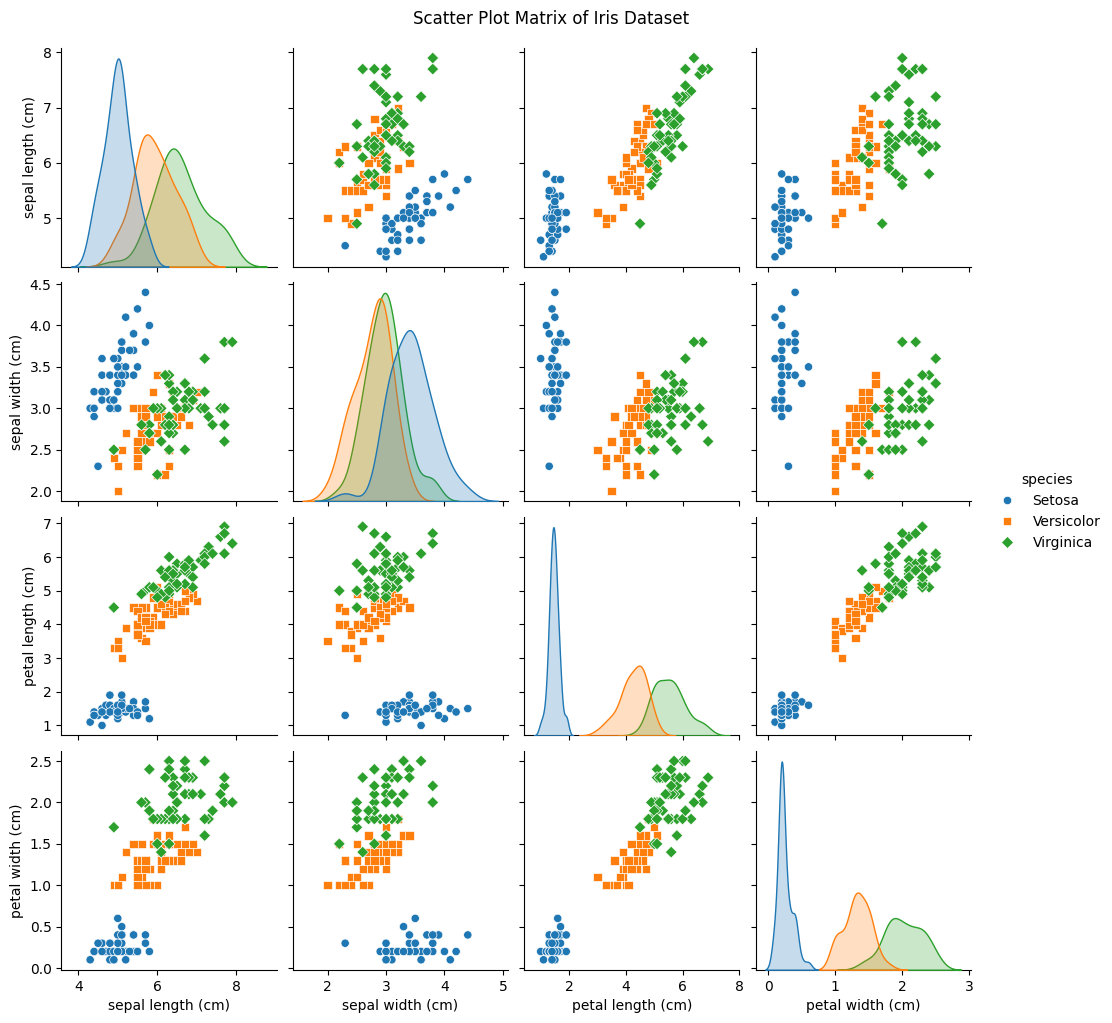

In [4]:
# Scatter Plot Matrix
sns.pairplot(df_iris, hue='species', markers=["o", "s", "D"])
plt.suptitle("Scatter Plot Matrix of Iris Dataset", y=1.02)
plt.show()

In [7]:
# --------------------------------------
# Part 3: Exploratory Data Analysis on education.csv
# --------------------------------------

# Load the dataset (Upload education.csv first)
df_edu = pd.read_csv("education.csv")

print(df_edu.head())
print(df_edu.info())
print(df_edu.columns)

  Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001   24    Male             3.58       1052                 291   
1     S00002   21   Other             2.52       1211                 112   
2     S00003   28  Female             3.42       1193                 715   
3     S00004   25    Male             2.43       1497                 170   
4     S00005   22    Male             2.08       1012                 599   

   University_GPA    Field_of_Study  Internships_Completed  \
0            3.96              Arts                      3   
1            3.63               Law                      4   
2            2.63          Medicine                      4   
3            2.81  Computer Science                      3   
4            2.48       Engineering                      4   

   Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  \
0                   7               2                  9                 8   
1       

In [8]:
# Select non-numeric columns
non_numeric_cols = df_edu.select_dtypes(exclude=['number']).columns

# Find unique values for each non-numeric column
unique_values = {col: df_edu[col].unique() for col in non_numeric_cols}

# Display unique values
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values ({len(values)}): {values}")
    print("-" * 50)

Column: Student_ID
Unique Values (5000): ['S00001' 'S00002' 'S00003' ... 'S04998' 'S04999' 'S05000']
--------------------------------------------------
Column: Gender
Unique Values (3): ['Male' 'Other' 'Female']
--------------------------------------------------
Column: Field_of_Study
Unique Values (7): ['Arts' 'Law' 'Medicine' 'Computer Science' 'Engineering' 'Business'
 'Mathematics']
--------------------------------------------------
Column: Current_Job_Level
Unique Values (4): ['Entry' 'Mid' 'Senior' 'Executive']
--------------------------------------------------
Column: Entrepreneurship
Unique Values (2): ['No' 'Yes']
--------------------------------------------------


/tmp/ipykernel_6563/1851491741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="viridis")
/tmp/ipykernel_6563/1851491741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="viridis")
/tmp/ipykernel_6563/1851491741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="viridis")
/tmp/ipykernel_6563/1851491741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

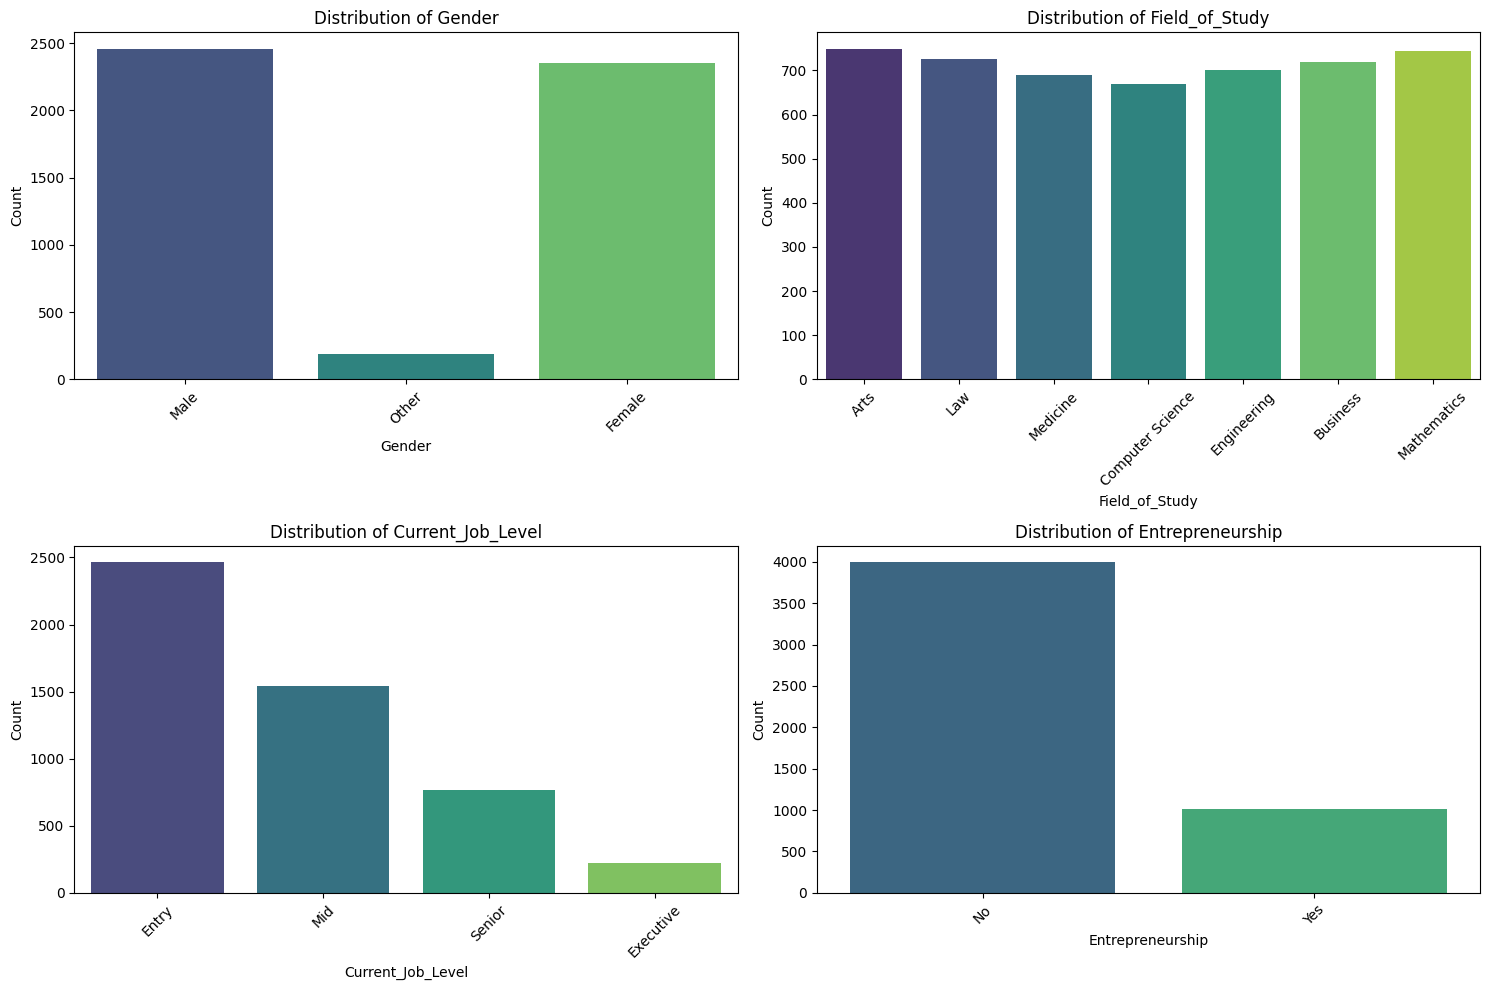

In [9]:
# Categorical columns to analyze
categorical_cols = ["Gender", "Field_of_Study", "Current_Job_Level", "Entrepreneurship"]

# Set up the figure size
plt.figure(figsize=(15, 10))

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Arrange in a 2x2 grid
    sns.countplot(data=df_edu, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.xlabel(col)
    plt.ylabel("Count")

# Adjust layout and display
plt.tight_layout()
plt.show()

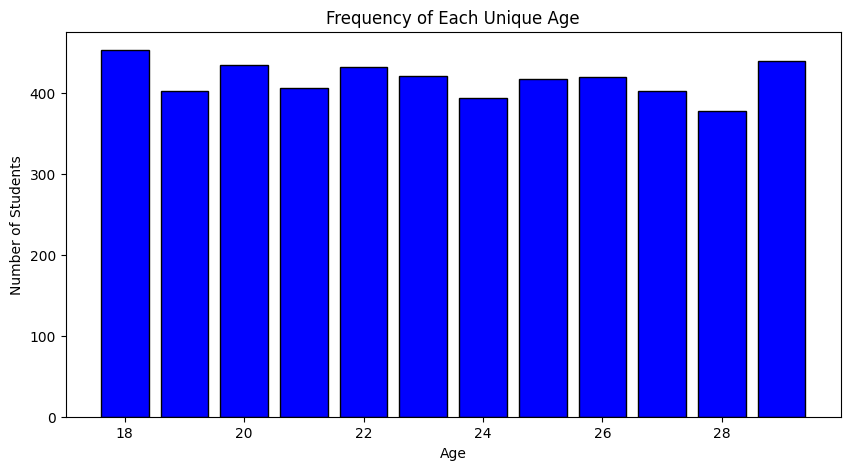

In [19]:
# Count occurrences of each unique age
age_counts = df_edu["Age"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values, color="blue", edgecolor="black")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.title("Frequency of Each Unique Age")

# Show the plot
plt.show()


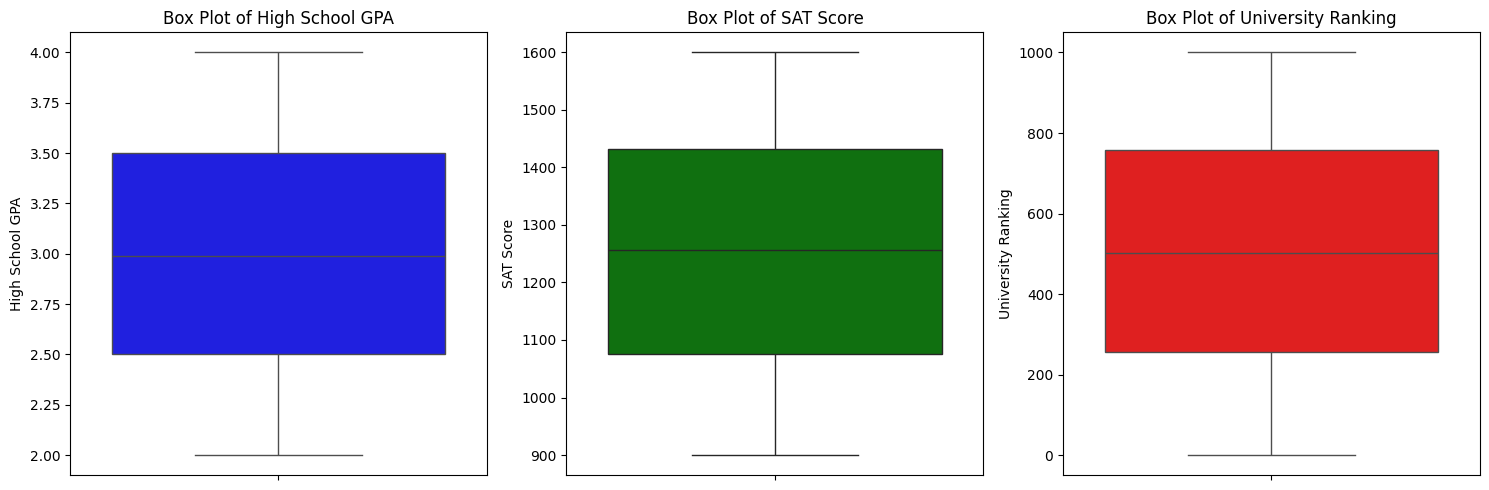

In [21]:
# Set figure size
plt.figure(figsize=(15, 5))

# High School GPA Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(y=df_edu["High_School_GPA"], color="blue")
plt.ylabel("High School GPA")
plt.title("Box Plot of High School GPA")

# SAT Score Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(y=df_edu["SAT_Score"], color="green")
plt.ylabel("SAT Score")
plt.title("Box Plot of SAT Score")

# University Ranking Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(y=df_edu["University_Ranking"], color="red")
plt.ylabel("University Ranking")
plt.title("Box Plot of University Ranking")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
len(df_edu["University_Ranking"].unique())

993

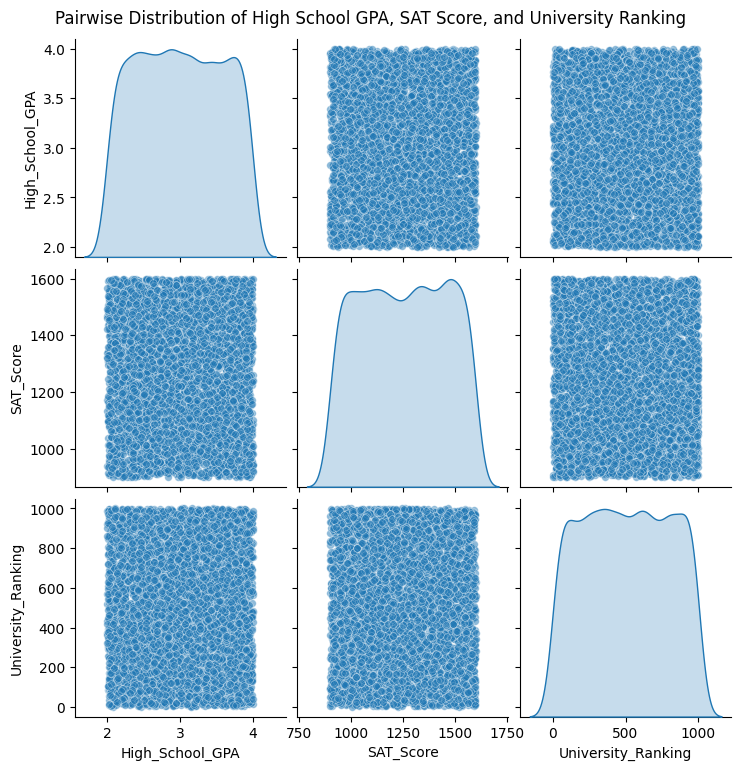

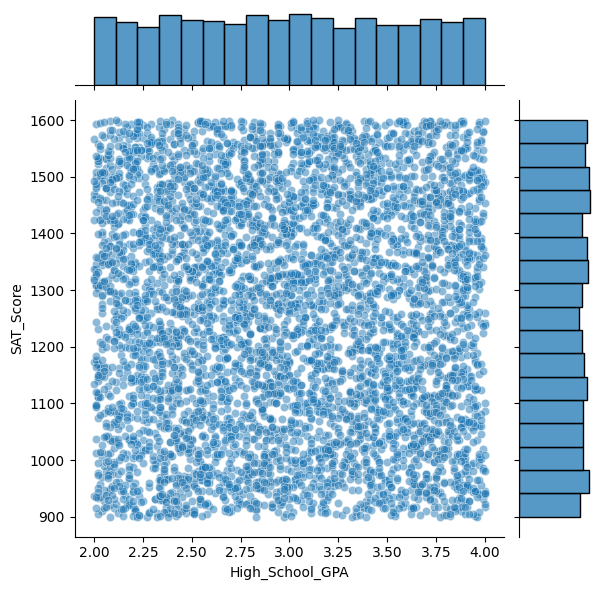

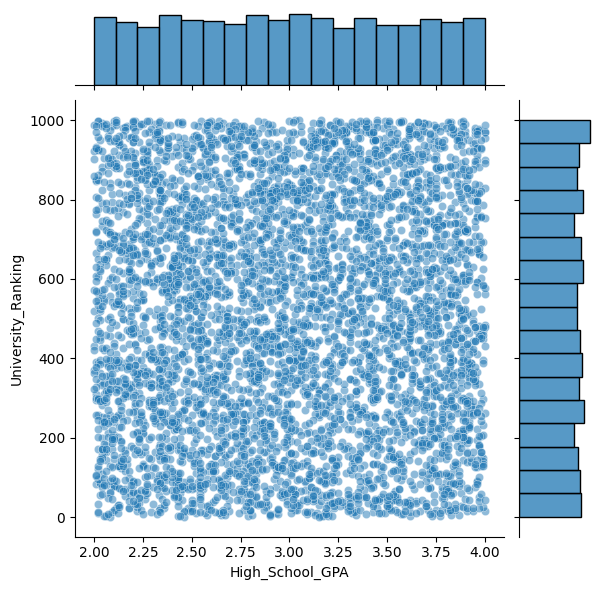

In [25]:
# Selecting relevant columns
columns = ["High_School_GPA", "SAT_Score", "University_Ranking"]

# Pair plot for understanding relationships
sns.pairplot(df_edu[columns], diag_kind="kde", markers="o", plot_kws={'alpha':0.5, 's':30})
plt.suptitle("Pairwise Distribution of High School GPA, SAT Score, and University Ranking", y=1.02)
plt.show()

# Joint plots for individual relationships
for col in columns:
    if col != "High_School_GPA":
        sns.jointplot(data=df_edu, x="High_School_GPA", y=col, kind="scatter", alpha=0.5)
        plt.show()

/tmp/ipykernel_6563/974314005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="viridis")
/tmp/ipykernel_6563/974314005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="viridis")
/tmp/ipykernel_6563/974314005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="viridis")
/tmp/ipykernel_6563/974314005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

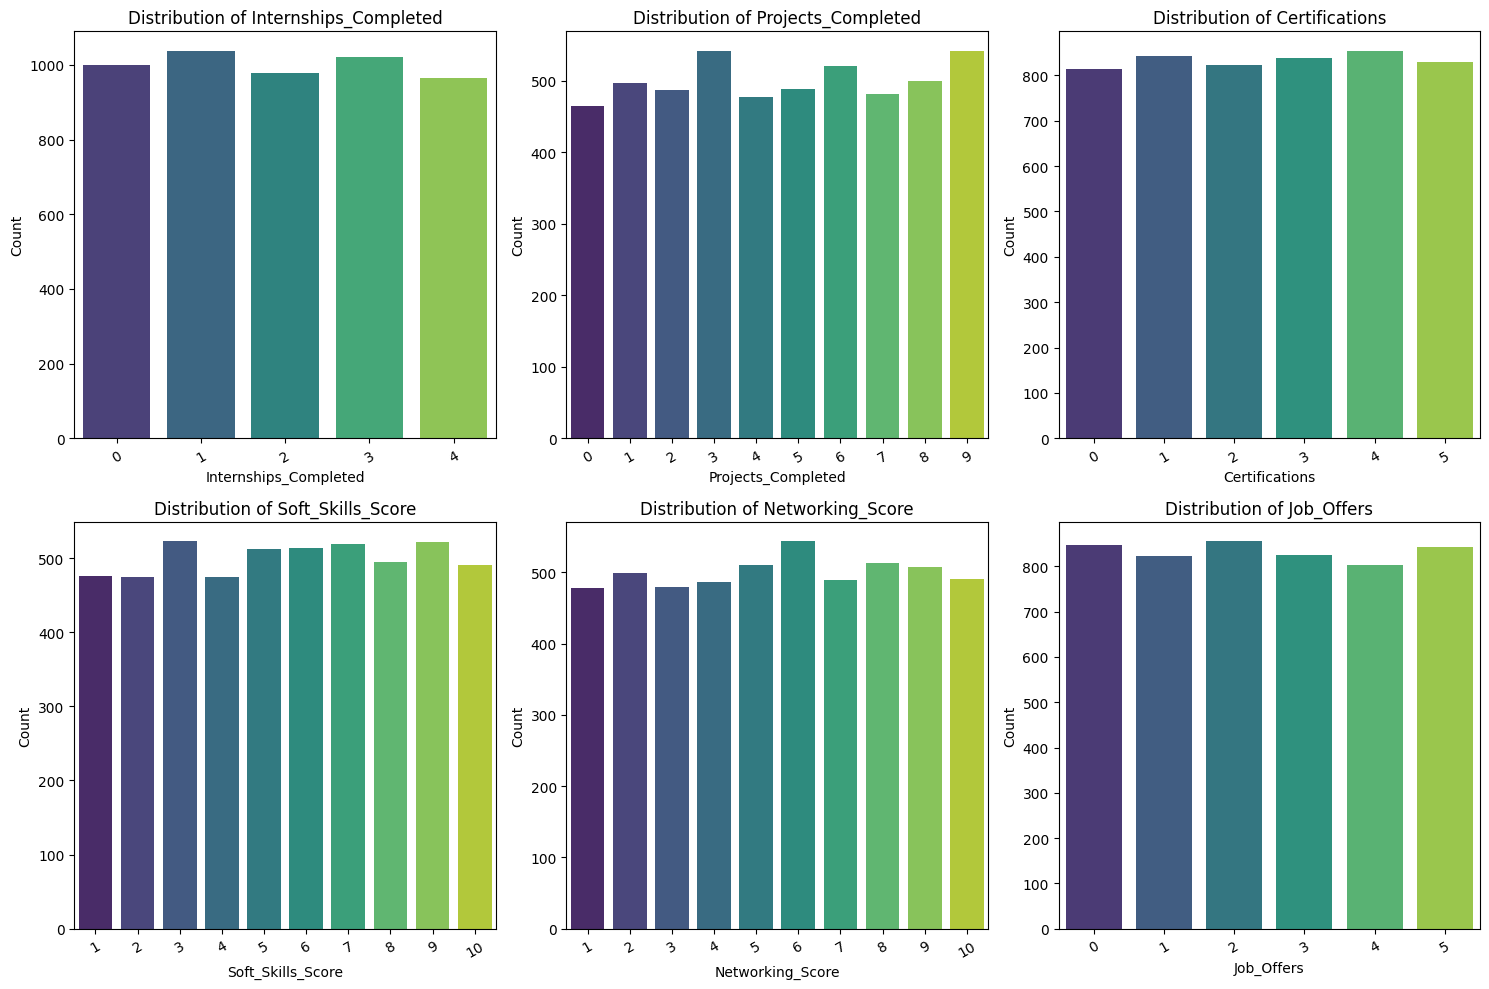

In [26]:
# Define the columns to plot
columns = ['Internships_Completed', 'Projects_Completed', 'Certifications',
           'Soft_Skills_Score', 'Networking_Score', 'Job_Offers']

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through each column and plot a bar graph
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(data=df_edu, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)  # Rotate labels if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

/tmp/ipykernel_6563/2194477000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="coolwarm")
/tmp/ipykernel_6563/2194477000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edu, x=col, palette="coolwarm")


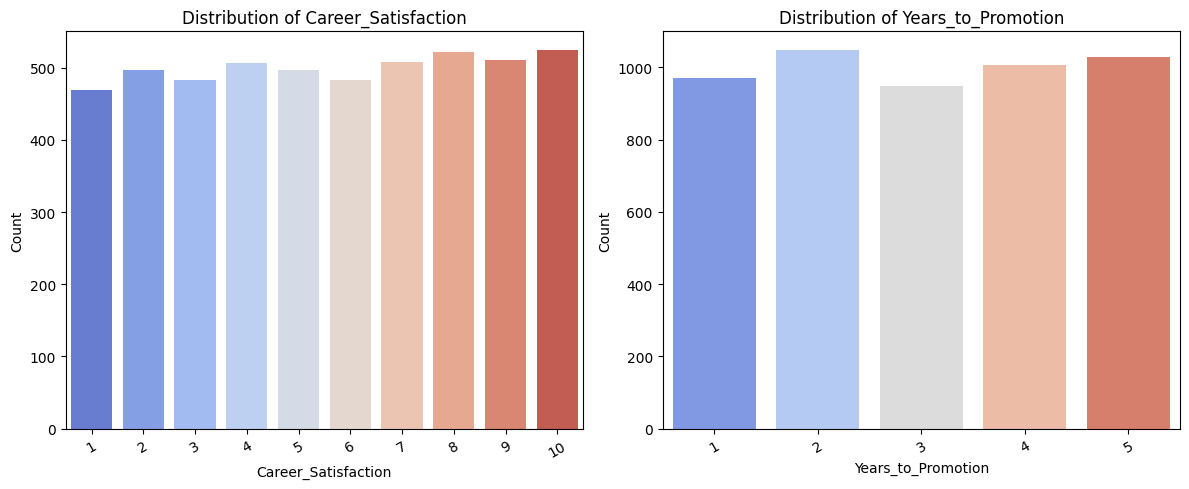

In [27]:
# Define the columns to plot
columns = ['Career_Satisfaction', 'Years_to_Promotion']

# Set figure size
plt.figure(figsize=(12, 5))

# Loop through each column and plot a bar graph
for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)  # 1 row, 2 columns
    sns.countplot(data=df_edu, x=col, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)  # Rotate labels if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

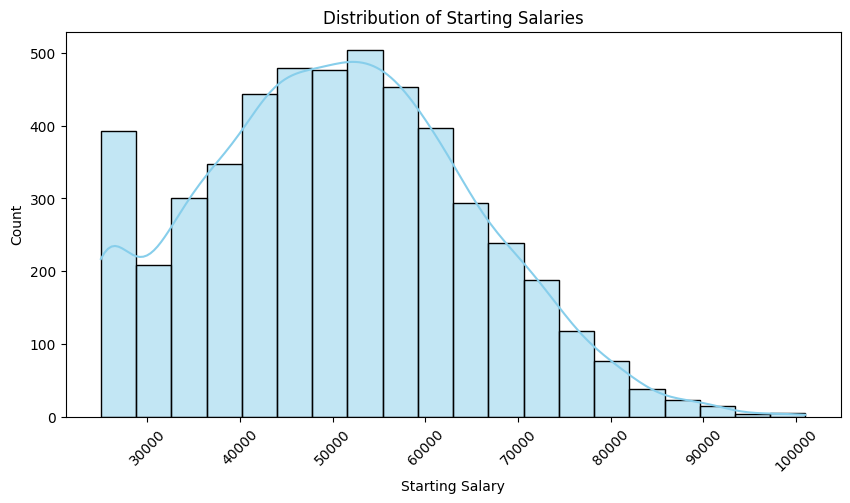

In [29]:
plt.figure(figsize=(10, 5))

# Create a bar chart for Starting Salary
sns.histplot(df_edu['Starting_Salary'], bins=20, kde=True, color='skyblue')

# Labels and title
plt.xlabel("Starting Salary")
plt.ylabel("Count")
plt.title("Distribution of Starting Salaries")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()